<a href="https://colab.research.google.com/github/MarigoldJ/ygl2/blob/main/mycode/modu/study_20210622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 간단한 신경망 모델 만들기 연습

## Data load

In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
# input data의 shape을 확인
print(f'train set : {x_train.shape[0]} 개')
print(f'test set : {x_test.shape[0]} 개')
print()
print('train:', x_train.shape)      # (60000, 28, 28) numpy array
print('test:', x_test.shape)        # (60000, 28, 28) numpy array

train set : 60000 개
test set : 10000 개

train: (60000, 28, 28)
test: (10000, 28, 28)


In [11]:
# output data의 shape을 확인
print(f'train set : {y_train.shape[0]} 개')
print(f'test set : {y_test.shape[0]} 개')
print()
print('train:', y_train.shape)      # (60000,) numpy array
print('test:', y_test.shape)        # (60000,) numpy array

train set : 60000 개
test set : 10000 개

train: (60000,)
test: (10000,)


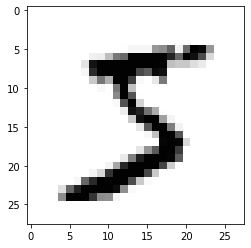

class : 5


In [15]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print('class :', y_train[0])

In [9]:
# 이미지가 숫자로 어떻게 표현되는지 확인
for x in x_train[0]:
    for i in x:
        print(f'{i:3d}', end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

## Data preprocess

In [26]:
# input data 전처리
'''
0~255의 정수를 0~1의 실수로 normalize
'''
X_train = x_train.reshape(x_train.shape[0], 28*28) / 255
X_test = x_test.reshape(x_test.shape[0], 28*28) / 255

In [27]:
# output data 전처리
'''
0~9의 숫자를 one-hot encoding하기
'''
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

## Modeling

In [36]:
# 모델 생성

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512, input_dim=28*28, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [37]:
# 모델 최적화 옵션
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

dir_model = './model'
if not os.path.exists(dir_model):
    os.mkdir(dir_model)

path_model = os.path.join(dir_model, '{epoch:02d}-{val_loss:.4f}.hdf5')
checkpointer = ModelCheckpoint(path_model,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)
early_stop_callback = EarlyStopping(monitor='val_loss',
                                    patience=10)


In [38]:
# 모델 학습
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30,
                    batch_size=200,
                    verbose=0,
                    callbacks=[early_stop_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.16061, saving model to ./model/01-0.1606.hdf5

Epoch 00002: val_loss improved from 0.16061 to 0.10717, saving model to ./model/02-0.1072.hdf5

Epoch 00003: val_loss improved from 0.10717 to 0.08341, saving model to ./model/03-0.0834.hdf5

Epoch 00004: val_loss improved from 0.08341 to 0.07323, saving model to ./model/04-0.0732.hdf5

Epoch 00005: val_loss improved from 0.07323 to 0.06915, saving model to ./model/05-0.0691.hdf5

Epoch 00006: val_loss improved from 0.06915 to 0.06399, saving model to ./model/06-0.0640.hdf5

Epoch 00007: val_loss improved from 0.06399 to 0.06263, saving model to ./model/07-0.0626.hdf5

Epoch 00008: val_loss improved from 0.06263 to 0.06099, saving model to ./model/08-0.0610.hdf5

Epoch 00009: val_loss did not improve from 0.06099

Epoch 00010: val_loss improved from 0.06099 to 0.06023, saving model to ./model/10-0.0602.hdf5

Epoch 00011: val_loss improved from 0.06023 to 0.05881, saving model to ./model/11-0.05

## Result

In [55]:
# test accuracy
score_test = model.evaluate(X_test, Y_test)
print(score_test)
# print(f'Test Accuracy: {model.evaluate(X_test, Y_test):.4f}')

print()
print(f'Test score : {100 * score_test[1]:.3f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9802
[0.07503443956375122, 0.9801999926567078]

Test score : 98.020 %


In [46]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']

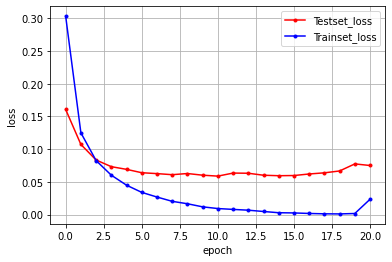

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프로 표현 : loss
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

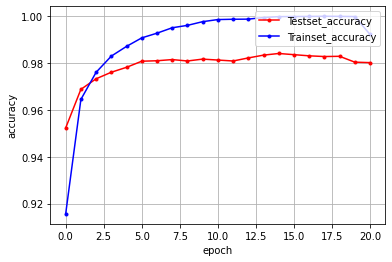

In [53]:
# 그래프로 표현 : accuracy
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c='red', label='Testset_accuracy')
plt.plot(x_len, y_acc, marker='.', c='blue', label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 컨볼루션 신경망 연습

## Data load

In [65]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [66]:
# input data의 shape을 확인
print(f'train set : {x_train.shape[0]} 개')
print(f'test set : {x_test.shape[0]} 개')
print()
print('train:', x_train.shape)      # (60000, 28, 28) numpy array
print('test:', x_test.shape)        # (60000, 28, 28) numpy array

train set : 60000 개
test set : 10000 개

train: (60000, 28, 28)
test: (10000, 28, 28)


In [67]:
# output data의 shape을 확인
print(f'train set : {y_train.shape[0]} 개')
print(f'test set : {y_test.shape[0]} 개')
print()
print('train:', y_train.shape)      # (60000,) numpy array
print('test:', y_test.shape)        # (60000,) numpy array

train set : 60000 개
test set : 10000 개

train: (60000,)
test: (10000,)


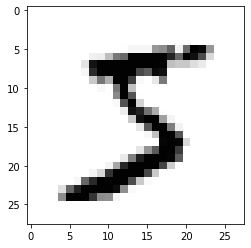

class : 5


In [68]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='Greys')
plt.show()
print('class :', y_train[0])

In [69]:
# 이미지가 숫자로 어떻게 표현되는지 확인
for x in x_train[0]:
    for i in x:
        print(f'{i:3d}', end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0 

## Data preprocess

In [77]:
# input data 전처리
'''
0~255의 정수를 0~1의 실수로 normalize
'''
X_train = x_train.reshape(x_train.shape[0], 28, 28, 1) / 255
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1) / 255

In [78]:
# output data 전처리
'''
0~9의 숫자를 one-hot encoding하기
'''
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

## Modeling

In [79]:
# 모델 생성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [80]:
# 모델 최적화 옵션
import os
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

dir_model = './model'
if not os.path.exists(dir_model):
    os.mkdir(dir_model)

path_model = os.path.join(dir_model, 'cnn_{epoch:02d}-{val_loss:.4f}.hdf5')
checkpointer = ModelCheckpoint(path_model,
                               monitor='val_loss',
                               verbose=1,
                               save_best_only=True)
early_stop_callback = EarlyStopping(monitor='val_loss',
                                    patience=10)


In [81]:
# 모델 학습
history = model.fit(X_train, Y_train,
                    validation_data=(X_test, Y_test),
                    epochs=30,
                    batch_size=200,
                    verbose=0,
                    callbacks=[early_stop_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.05996, saving model to ./model/cnn_01-0.0600.hdf5

Epoch 00002: val_loss improved from 0.05996 to 0.04318, saving model to ./model/cnn_02-0.0432.hdf5

Epoch 00003: val_loss improved from 0.04318 to 0.03877, saving model to ./model/cnn_03-0.0388.hdf5

Epoch 00004: val_loss improved from 0.03877 to 0.03256, saving model to ./model/cnn_04-0.0326.hdf5

Epoch 00005: val_loss improved from 0.03256 to 0.03220, saving model to ./model/cnn_05-0.0322.hdf5

Epoch 00006: val_loss improved from 0.03220 to 0.03038, saving model to ./model/cnn_06-0.0304.hdf5

Epoch 00007: val_loss improved from 0.03038 to 0.02695, saving model to ./model/cnn_07-0.0270.hdf5

Epoch 00008: val_loss did not improve from 0.02695

Epoch 00009: val_loss did not improve from 0.02695

Epoch 00010: val_loss did not improve from 0.02695

Epoch 00011: val_loss did not improve from 0.02695

Epoch 00012: val_loss did not improve from 0.02695

Epoch 00013: val_loss did not improve from 

## Result

In [82]:
# test accuracy
score_test = model.evaluate(X_test, Y_test)
print(score_test)
# print(f'Test Accuracy: {model.evaluate(X_test, Y_test):.4f}')

print()
print(f'Test score : {100 * score_test[1]:.3f} %')

313/313 [==============================] - 1s 3ms/step - loss: 0.0322 - accuracy: 0.9918
[0.032229624688625336, 0.9918000102043152]

Test score : 99.180 %


In [83]:
y_loss = history.history['loss']
y_acc = history.history['accuracy']

y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']

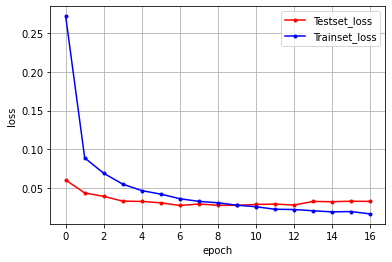

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프로 표현 : loss
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

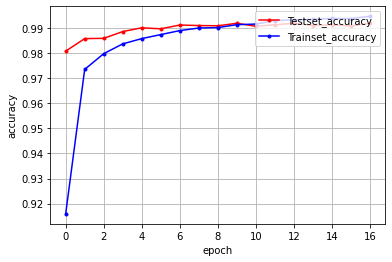

In [85]:
# 그래프로 표현 : accuracy
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vacc, marker='.', c='red', label='Testset_accuracy')
plt.plot(x_len, y_acc, marker='.', c='blue', label='Trainset_accuracy')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

# 제목